In [3]:
from sklearn.datasets import load_iris
iris= load_iris()

In [5]:
import pandas as pd
iris_df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [7]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_data=scaler.fit_transform(iris.data)
iris_df.loc[:,:]=scaled_data

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.2,random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier= RandomForestClassifier()
rf_classifier.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=rf_classifier.predict(x_test)
print("Accuracy score is :",accuracy_score(y_test,y_pred))
print("confusion matrix is :",confusion_matrix(y_test,y_pred))
print("classification report is :",classification_report(y_test,y_pred))

Accuracy score is : 1.0
confusion matrix is : [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
classification report is :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



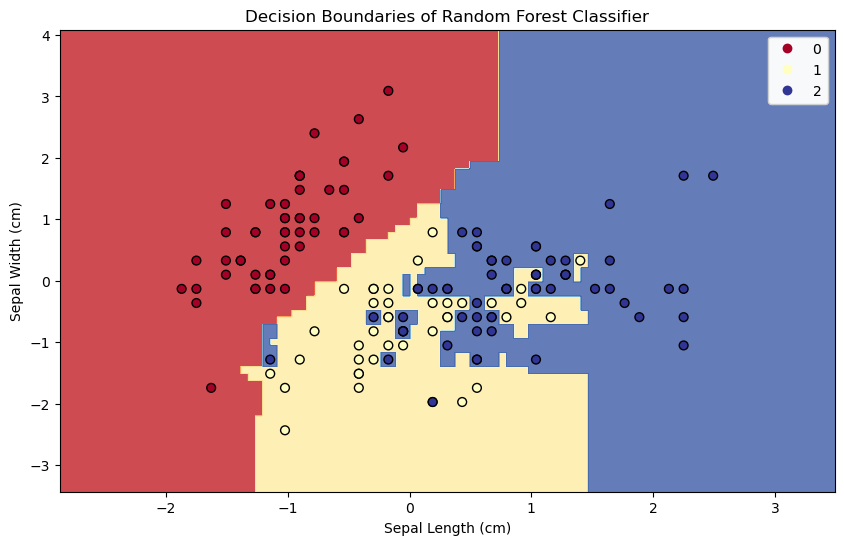

In [40]:
import numpy as np
import matplotlib.pyplot as plt
x=iris.data[:,:2]
y=iris.target
rf_classifier= RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=42)
rf_classifier.fit(x,y)
x_min,x_max=x[:,0].min()-1,x[:,0].max()+1
y_min,y_max=x[:,1].min()-1,x[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
z=rf_classifier.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
plt.figure(figsize=(10,6))
plt.contourf(xx,yy,z,cmap=plt.cm.RdYlBu,alpha=0.8)
scatter = plt.scatter (x[:, 0], x[:, 1], c=y, cmap=plt.cm. RdYlBu, edgecolor='k', s=40)

plt.xlabel("Sepal Length (cm)")

plt.ylabel("Sepal Width (cm)")

plt.title("Decision Boundaries of Random Forest Classifier")

legend=plt.legend(*scatter.legend_elements(), loc= "upper right") 

plt.gca().add_artist (legend)

plt.show()